# imports
2020-01-25 19:09:58 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

# Data


## Load Data

In [2]:
iris = sns.load_dataset('iris')
iris.head()

X_iris = iris.drop('species', axis=1)
Y_iris = iris['species']

## Split data into train, test

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_iris,
                                                    Y_iris,
                                                    random_state=1)

print(" train shape. X_train: ", X_train.shape, " Y_train: ", Y_train.shape)
print(" test shape. X_test: ", X_test.shape, "Y_test: ", Y_test.shape)

 train shape. X_train:  (112, 4)  Y_train:  (112,)
 test shape. X_test:  (38, 4) Y_test:  (38,)


# Model 1 Supervised: Gaussian Naive Bayes


```python
Gaussian Naive Bayes

GaussianNB(priors=None, var_smoothing=1e-09) 

```

## Fit the model

In [4]:
from sklearn.naive_bayes import GaussianNB

In [5]:
model = GaussianNB()
model.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

## Infer the model

In [6]:
Y_pred_model = model.predict(X_test)

## Accuracy Score

In [7]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(Y_test, Y_pred_model)
print(" accuracy of model: ", acc)

 accuracy of model:  0.9736842105263158


# Model 2 Unsupervised Dimensionality reduction: PCA


```python

PCA(
    n_components=None,
    copy=True,
    whiten=False,
    svd_solver='auto',
    tol=0.0,
    iterated_power='auto',
    random_state=None,
)

```

## fit the model

In [8]:
from sklearn.decomposition import PCA

model = PCA(n_components=2)
model.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

## transform using model

In [9]:
X_iris_2D = model.transform(X_iris)

## Visualise the tranform

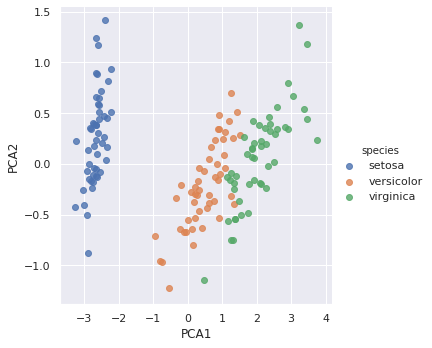

In [10]:
iris['PCA1'] = X_iris_2D[:, 0]
iris['PCA2'] = X_iris_2D[:, 1]

sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False)

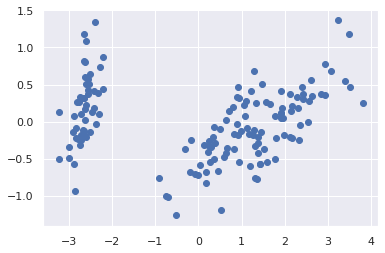

In [72]:
plt.scatter(X_iris_2D[:, 0], X_iris_2D[:, 1])

# Model 3: Unsupervised clustering: Gaussian Mixture Models(GMM)


```python

GaussianMixture(
    n_components=1,
    covariance_type='full', #covariance_type : {'full' (default), 'tied', 'diag', 'spherical'}
    tol=0.001,
    reg_covar=1e-06,
    max_iter=100,
    n_init=1,
    init_params='kmeans', #init_params : {'kmeans', 'random'}, defaults to 'kmeans'.
    weights_init=None, 
    means_init=None,
    precisions_init=None,
    random_state=None,
    warm_start=False,
    verbose=0,
    verbose_interval=10,
)

```

## fit the model

In [11]:
from sklearn.mixture import GaussianMixture

In [12]:
model = GaussianMixture(n_components=3, covariance_type='full')

model.fit(X_train)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

## Infer the model

In [14]:
y_gmm = model.predict(X_iris)
iris['cluster'] = y_gmm
print(y_gmm)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2
 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


## Visualise the output

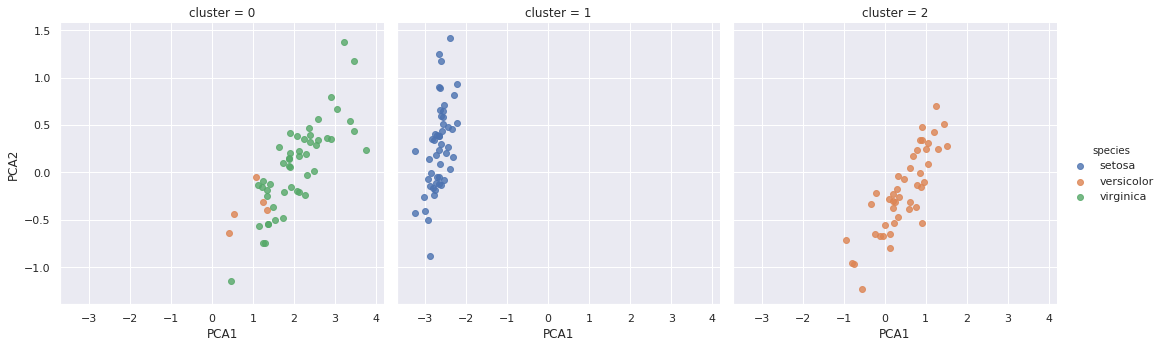

In [15]:
sns.lmplot('PCA1',
           'PCA2',
           data=iris,
           hue='species',
           col='cluster',
           fit_reg=False)

## Accuracy

It is vague here to define the accuracy. Please take full care while defining. I am not very clear about it, but if you are please help me out to improve this

In [16]:
species = {'setosa': 1, 'virginica': 0, 'versicolor': 2}

Y_iris_encode = []

for label in Y_iris:
    code = species[label]
    Y_iris_encode.append(code)

print(Y_iris_encode)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [17]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(Y_iris_encode, y_gmm)
print(" accuracy_score of gmm model: ", acc)

 accuracy_score of gmm model:  0.9666666666666667
